# Notebook 1: Visualización y EDA 

## Dataset: Wine Quality 
### Datos sobre la calidad de "Vinho Verde" originario de Portugal. Es un dataset para vino blanco y otro para vino tinto.
### Usaremos el de vino blanco debido a que tiene mayor cantidad de instancias. El objetivo es ver si se puede identificar alguna tendencia en la calidad del vino
### **Este dataset fue tomado del repositorio de UC Irvine**
#### Las ideas para varios plots fueron tomados de las diapositivas de la clase, algunos códigos fueron ayuda de ChatGPT

---

## Cargar librerías de manejo de datos 

In [2]:
import numpy as np
import pandas as pd

## Cargar librerías de visualización

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

---

## Cargar y ver datos en forma tabular 

In [5]:
df = pd.read_csv("winequality-white.csv",delimiter = ';')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

### Tipos de datos de cada feature

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### No esta de más la información estadística 

In [50]:
promedios = df.mean()
desviaciones = df.std()
maximos = df.max()
minimos = df.min()

stats = pd.DataFrame({'Promedio': promedios, 'Desviación estándar': desviaciones, 'Porcentaje desviación': (desviaciones/promedios*100), 'Maximos':maximos, 'Minimos':minimos })

print(stats)


                        Promedio  Desviación estándar  Porcentaje desviación  \
fixed acidity           6.854788             0.843868              12.310640   
volatile acidity        0.278241             0.100795              36.225612   
citric acid             0.334192             0.121020              36.212711   
residual sugar          6.391415             5.072058              79.357355   
chlorides               0.045772             0.021848              47.731797   
free sulfur dioxide    35.308085            17.007137              48.167827   
total sulfur dioxide  138.360657            42.498065              30.715425   
density                 0.994027             0.002991               0.300888   
pH                      3.188267             0.151001               4.736135   
sulphates               0.489847             0.114126              23.298267   
alcohol                10.514267             1.230621              11.704292   
quality                 5.877909        

--- 

## Inicio de visualización de datos 
#### Vamos a empezar con visualizaciones desde puntos de vista muy generales para observar alguna tendencia a grandes rasgos y de ahí, partir con un EDA más profundo

### Histogramas sencillos
#### Para un primer acercamiento

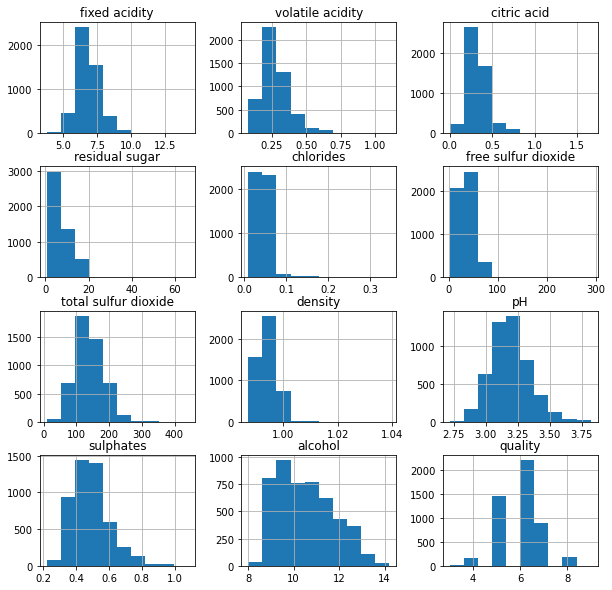

In [27]:
df.hist(figsize = (10,10))
plt.show()

#### Zoom al histograma de calidad para observar de forma detallada la tendencia

<function matplotlib.pyplot.show(close=None, block=None)>

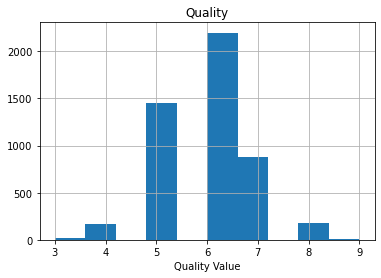

In [34]:
df['quality'].hist()
plt.title('Quality')
plt.xlabel('Quality Value')
plt.show

### Pairplot o scatter plot matrix de seaborn 
#### Para un acercamiento desde otro punto de vista

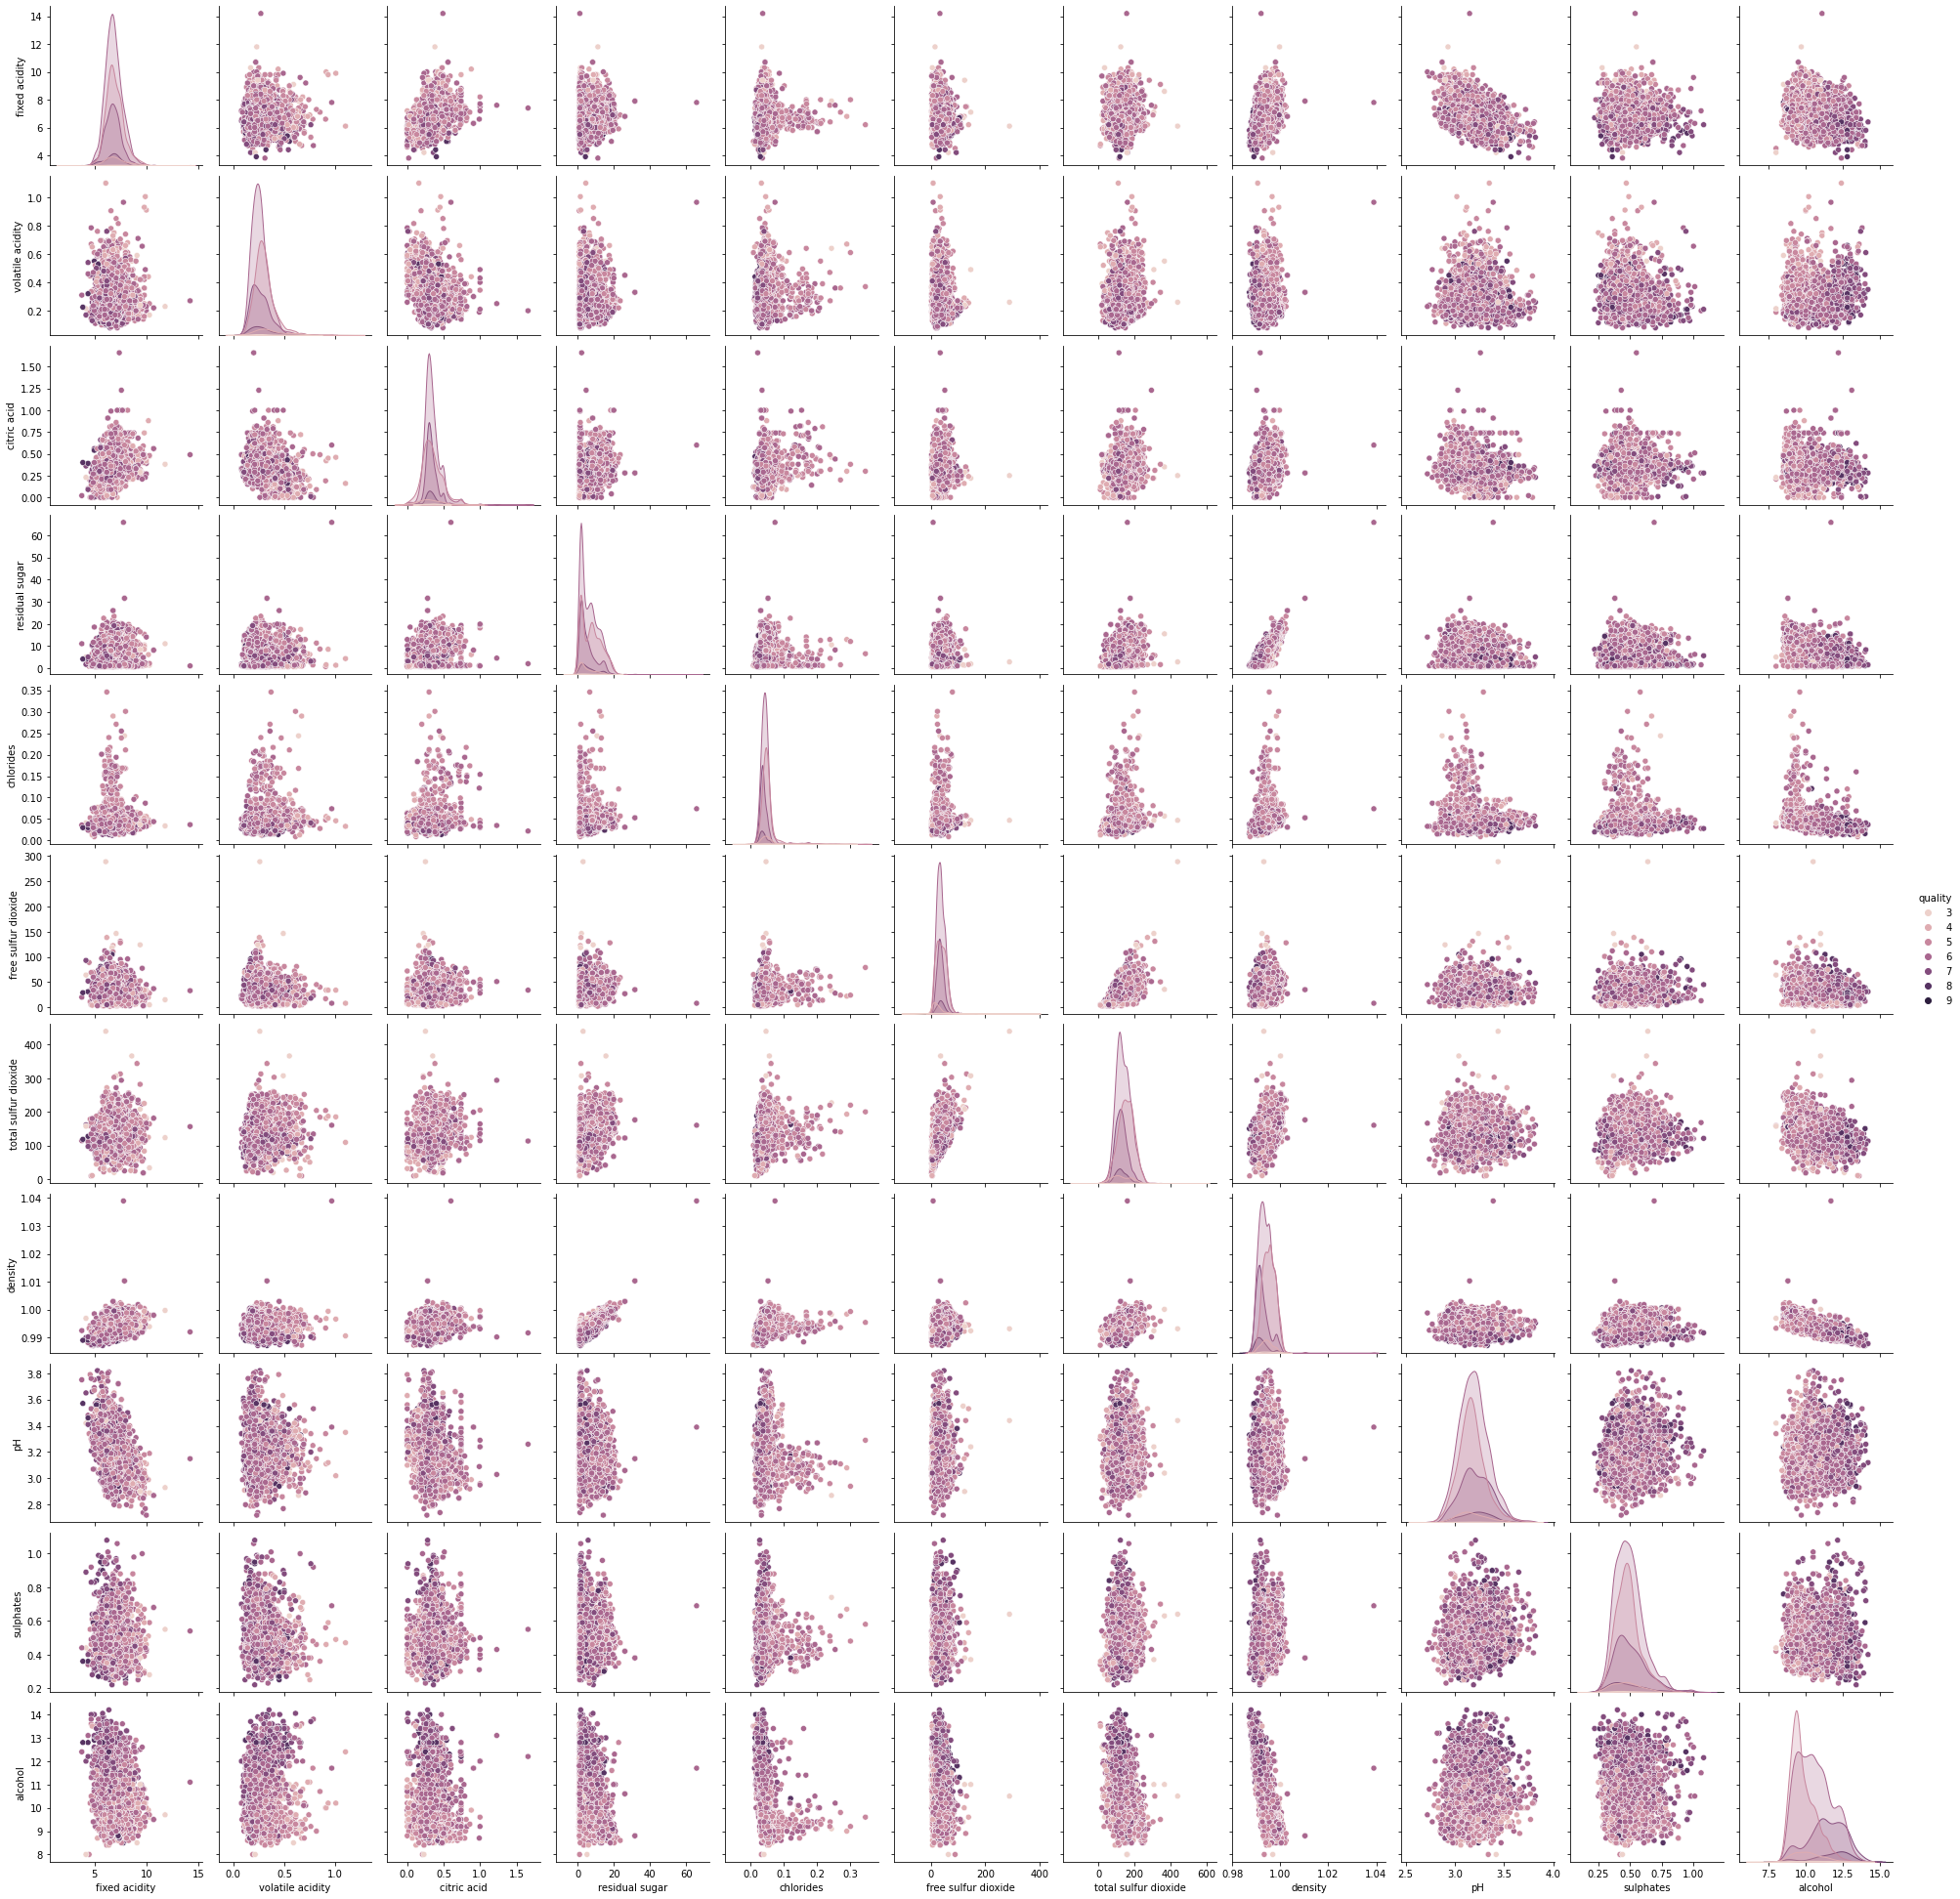

In [9]:
sns.pairplot(df, hue = 'quality')
plt.show()

#### Estos plots nos permitieron tener una vista muy general de nuestros datos

--- 

## Pairplot coloreado por alta y baja calidad
#### Este fue generado con ayuda de ChatGPT, sin embargo no fue posible eliminar los plots relacionados con "quality"
#### Permite generar una ayuda visual más precisa sobre cuales variables ayudan a tener un vino mejor
#### Desde grandes rasgos, puede ser alcohol, sulphate, pH, residual sugar y volatile acidity

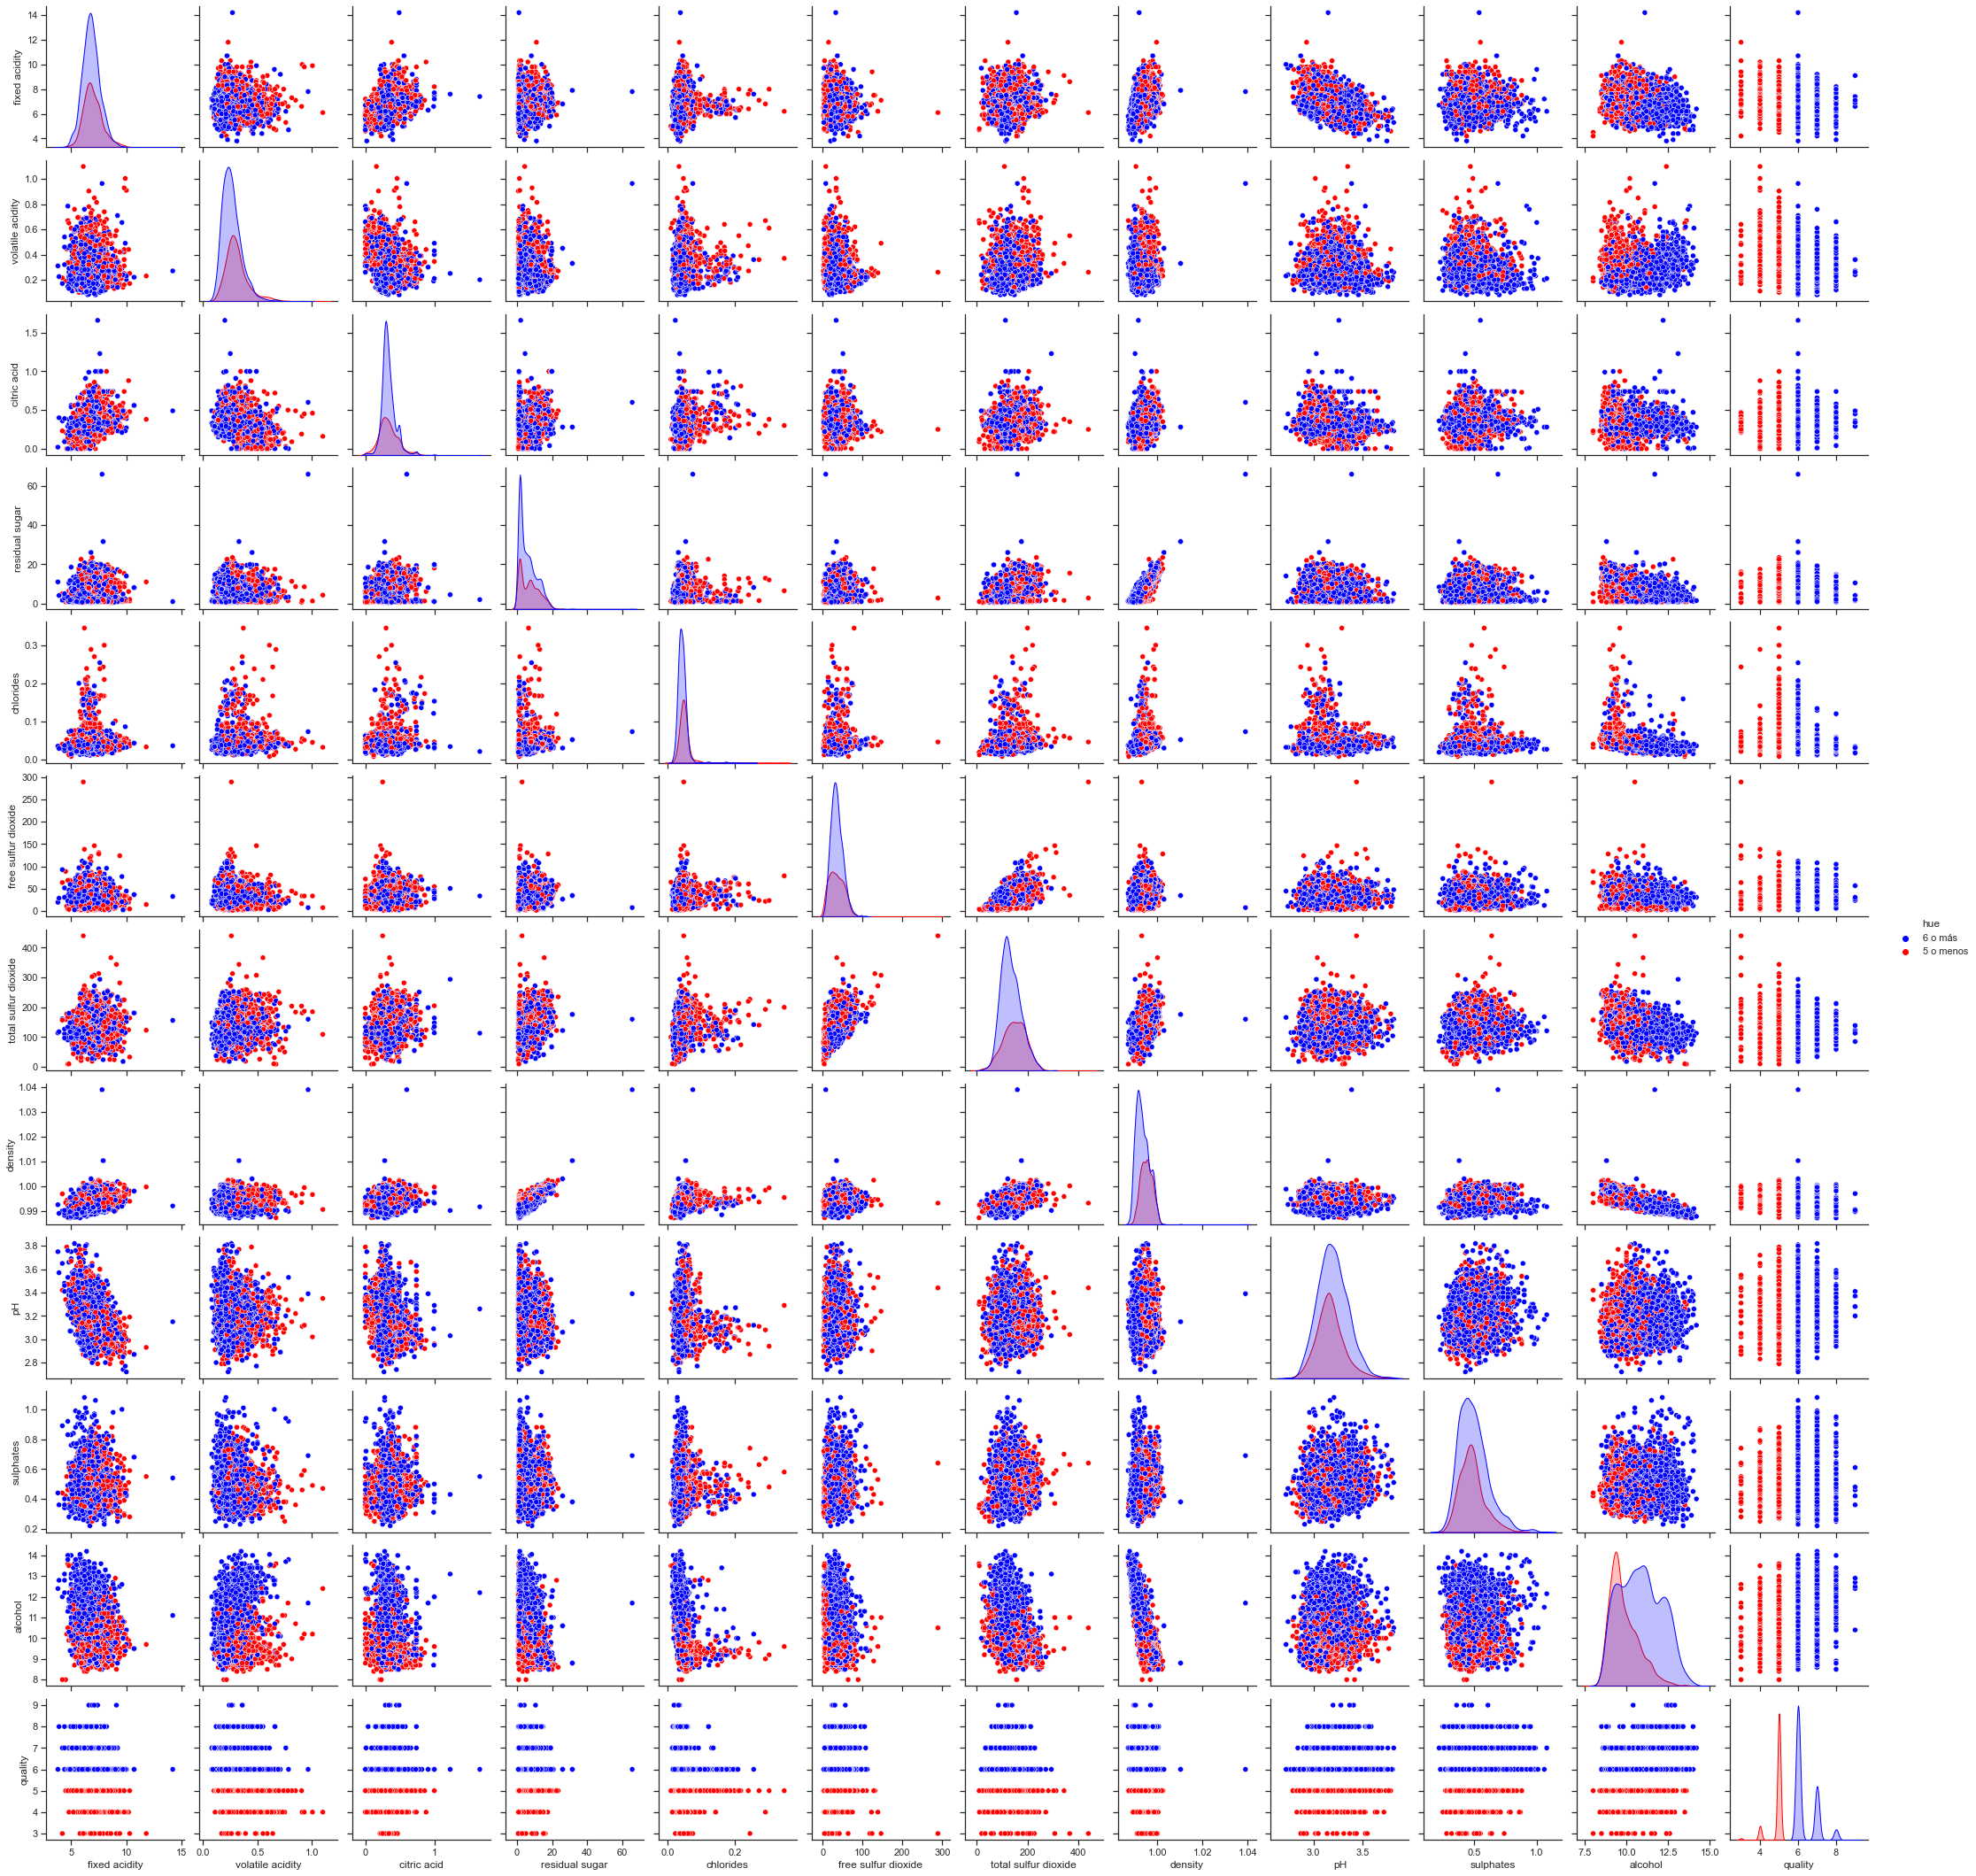

In [64]:
label_column = 'quality'  # Replace 'target' with the actual name of your label column

# Create a new column for the hue based on label values
df['hue'] = df[label_column].apply(lambda x: '6 or higher' if x >= 6 else '5 or lower')

# Define the custom color palette
custom_palette = {"6 or higher": "blue", "5 or lower": "red"}

# Create a pairplot with different colors based on the 'hue' column and custom palette
sns.set(style="ticks")
g = sns.pairplot(df, hue='hue', palette=custom_palette)

# Manually set legend labels
new_labels = {'6 or higher': '6 o más', '5 or lower': '5 o menos'}
for t, l in zip(g._legend.texts, new_labels.values()):
    t.set_text(l)

# Show the pairplot
plt.show()


## Distribución de Quality vs Features del dataset

#### Haremos scatter plots en donde el eje vertical es nuestra label. Al final tenemos un histograma de nuestra label. Este fue generado con la ayuda de ChatGPT y modificado

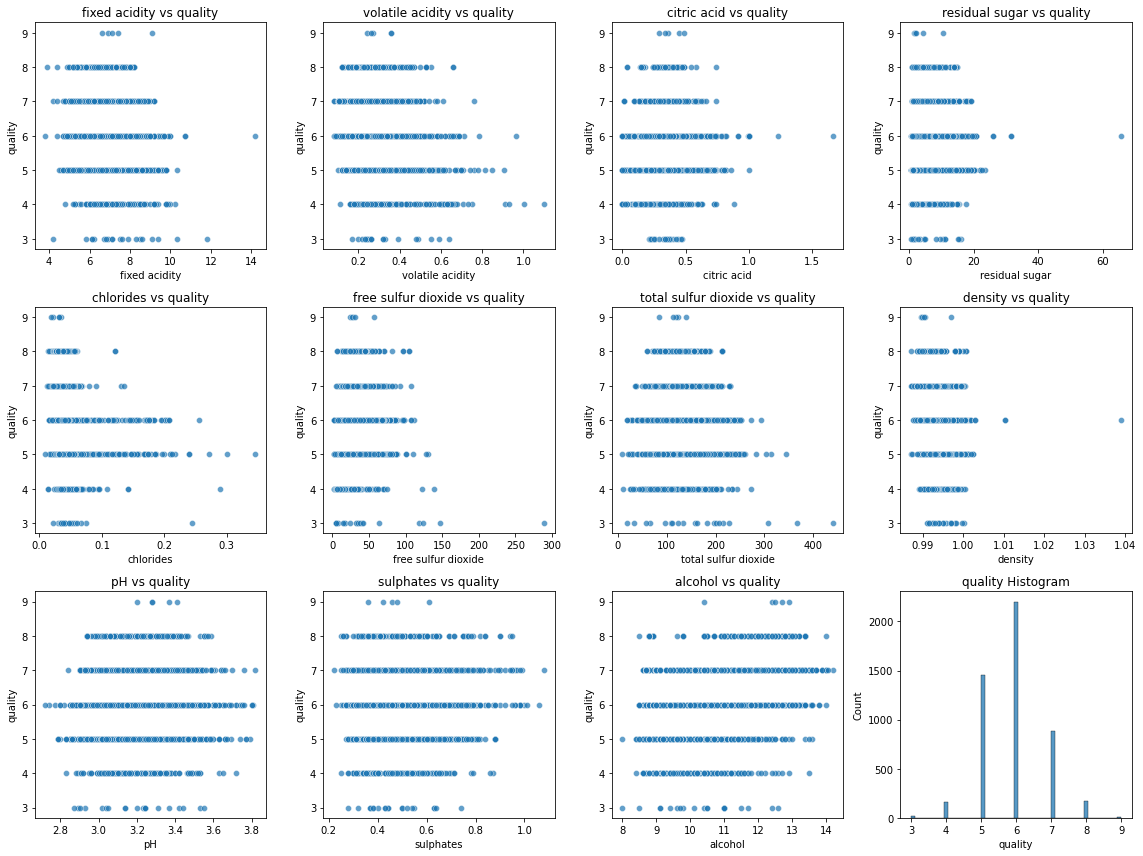

In [36]:
# Assuming 'df' is your DataFrame
label_column = 'quality'  # Replace 'target' with the actual name of your label column
feature_columns = df.columns.drop(label_column)

# Calculate the number of columns for the subplot grid
num_cols = 4
num_rows = 3  # Three rows for the label variable

# Increase the width by adjusting the figsize
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))  # Adjust the width and height as needed

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each feature and create scatter plots
for i, feature in enumerate(feature_columns):
    sns.scatterplot(data=df, x=feature, y=label_column, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{feature} vs {label_column}')

# Create a histogram for the label variable in the last subplot
sns.histplot(data=df, x=label_column, ax=axes[-1])
axes[-1].set_title(f'{label_column} Histogram')

plt.tight_layout()
plt.show()



### A partir de estos plots, me gustaría visualizarlos en forma de violín

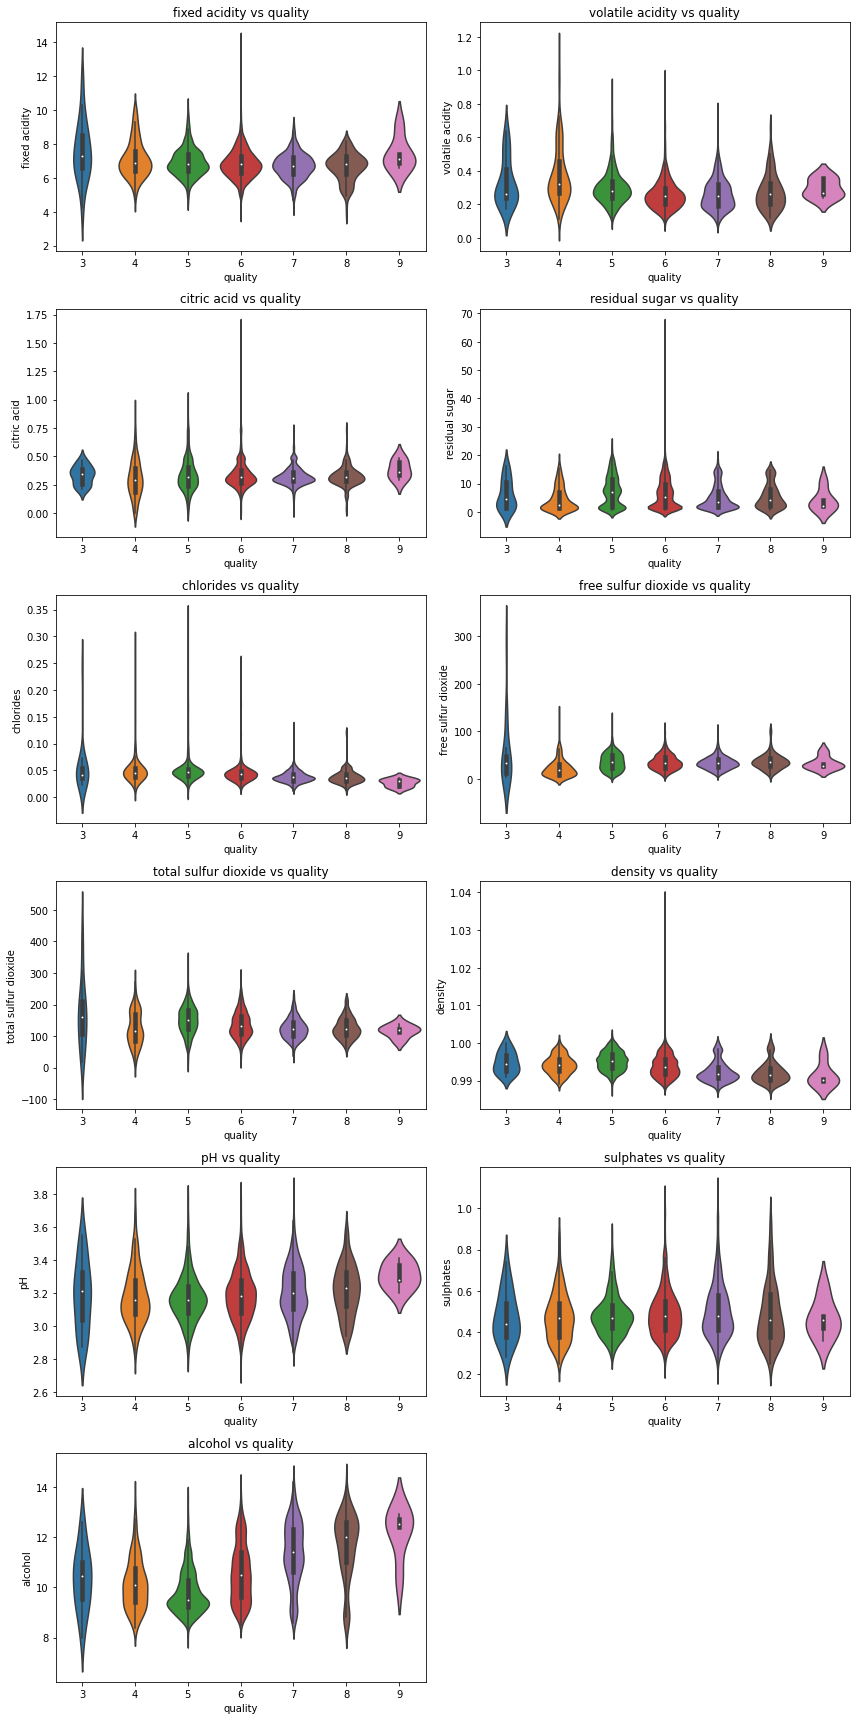

In [42]:
label_column = 'quality'  # Replace 'target' with the actual name of your label column
feature_columns = df.columns.drop(label_column)

# Set up subplots
num_features = len(feature_columns)
num_rows = (num_features + 1) // 2  # Arrange plots in 2 columns, adjust as needed
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Create violin plots for each feature vs. the label
for i, feature in enumerate(feature_columns):
    sns.violinplot(data=df, x=label_column, y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} vs {label_column}')

# Remove any empty subplots if the number of features is odd
if num_features % 2 == 1:
    fig.delaxes(axes[-1])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


#### Desde este punto de vista, se puede ver que las variables que mayor afectan para un buen vino blanco son: alcohol, pH, citric acid, fixed acidity y volatile acidity 

--- 

# Breve recapitulación 

### En este EDA, se utilizó el dataset sobre datos fisicoquímicos de vino blanco para evaluar su calidad. Primero se generaron descripciones de los datos para entrar un poco en contexto sobre lo esperado. Despuúes, se obtuvieron a forma de instinto algunas gráficas de visualización sencilla y para gráficos más complejos se utilizó la ayuda de ChatGPT. 

### Utilizando varios puntos de vista distintos,se determinó que las variables más influyentes para una calificación alta fueron: alcohol, pH, citric acid, fixed acidity y volatile acidity. Una de las aproximaciones permitió ver esta tendencia de forma más clara, pero menos notoria, mientras que el diagrama de violín permitió que fuera un poco más notorio, pero las diferencias son sútiles

#### Los papers revisados con este dataset no presentan un EDA profundo